In [13]:
from tensorboard.backend.event_processing import event_accumulator
import numpy as np

def _load_run(path):
    event_acc = event_accumulator.EventAccumulator(path)
    event_acc.Reload()
    data = {}

    for tag in sorted(event_acc.Tags()["scalars"]):
        x, y = [], []

        for scalar_event in event_acc.Scalars(tag):
            x.append(scalar_event.step)
            y.append(scalar_event.value)

        data[tag] = (np.asarray(x), np.asarray(y))
    return data

arrays = _load_run("runs/AlexNet_experiment_0000")

In [273]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
# create a color palette
cols = ['#00429d', '#2d5c9d', '#4575a0', '#5c8da4', '#75a5ab', '#92bdb5', '#b3d4c1', '#d7eacf', 
        '#e8ded2', '#eebea9', '#eb9f85', '#e38067', '#d66250', '#c44440', '#ae2538', '#93003a']

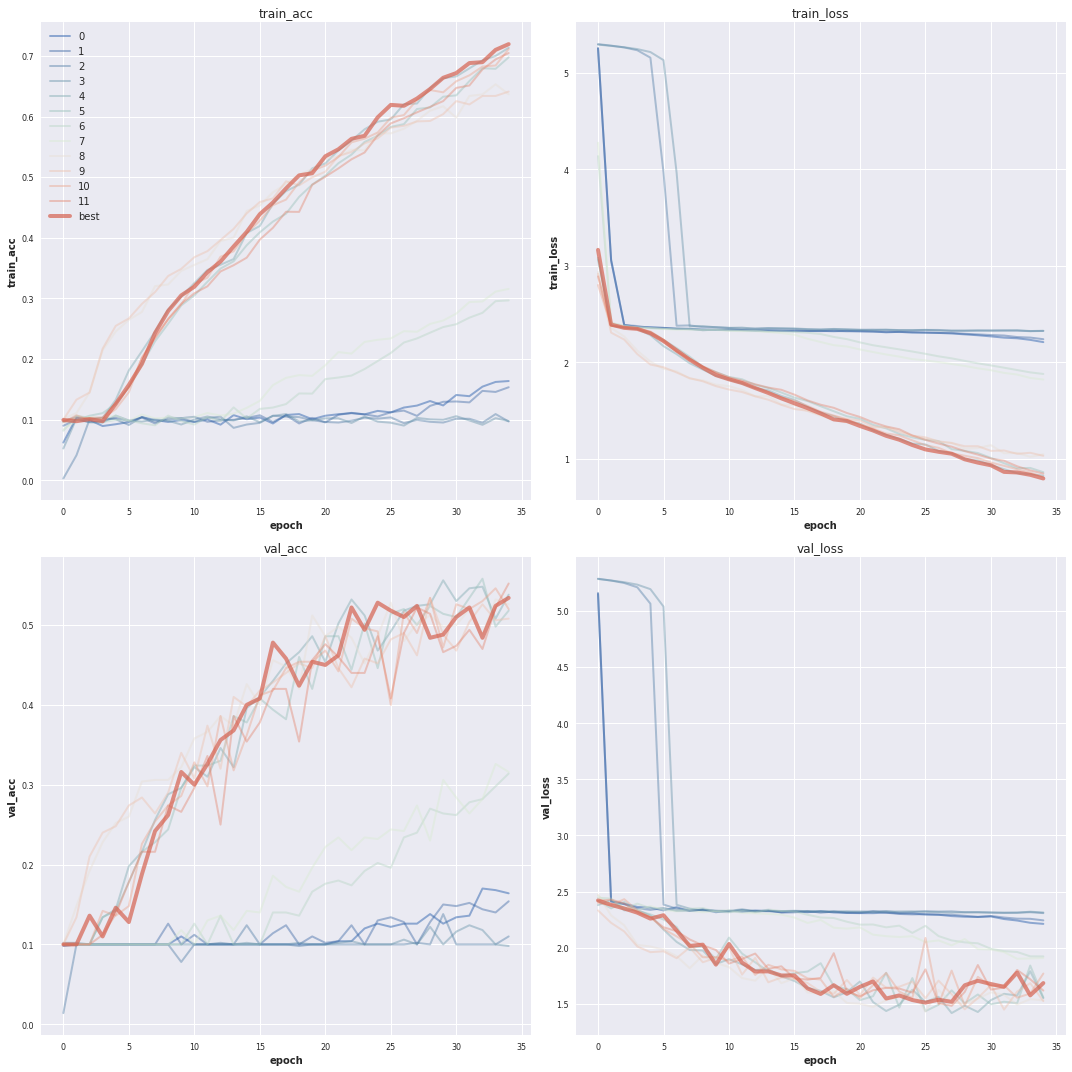

In [272]:
import glob as glob
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ids = []
k = 0
for i in range(2):
    for j in range(2):
        ids.append([i,j])
        
        axes[i, j].set_title(keys[k])
        axes[i, j].set_ylabel(keys[k])
        axes[i, j].set_xlabel('epoch')
        k += 1
        
for j, file in enumerate(glob.glob("runs/*")):
    arrays = _load_run(file)
    keys = []
    items = []
    for key, item in arrays.items():
        keys.append(key)
        items.append(item)  
    col = cols[j]
    for i in range(4):
        x = items[i][0]
        y = items[i][1]
        lw = 2
        alpha = 0.4
        if(file == 'runs\\AlexNet_experiment_best'):
            lw = 4
            alpha = 0.7
            
        axes[ids[i][0], ids[i][1]].plot(x, y, color=col, lw = lw, alpha = alpha)

legs = list(np.arange(j))
legs.append('best')
axes[0,0].legend(legs)
        
figure.tight_layout()
figure.savefig("figures\\results.png")